In [4]:
pip install -q kaggle

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download thomasdubail/brain-tumors-256x256

Dataset URL: https://www.kaggle.com/datasets/thomasdubail/brain-tumors-256x256
License(s): CC0-1.0


In [7]:
! unzip brain-tumors-256x256.zip

Archive:  brain-tumors-256x256.zip
  inflating: Data/glioma_tumor/G_1.jpg  
  inflating: Data/glioma_tumor/G_10.jpg  
  inflating: Data/glioma_tumor/G_100.jpg  
  inflating: Data/glioma_tumor/G_101.jpg  
  inflating: Data/glioma_tumor/G_102.jpg  
  inflating: Data/glioma_tumor/G_103.jpg  
  inflating: Data/glioma_tumor/G_104.jpg  
  inflating: Data/glioma_tumor/G_105.jpg  
  inflating: Data/glioma_tumor/G_106.jpg  
  inflating: Data/glioma_tumor/G_107.jpg  
  inflating: Data/glioma_tumor/G_108.jpg  
  inflating: Data/glioma_tumor/G_109.jpg  
  inflating: Data/glioma_tumor/G_11.jpg  
  inflating: Data/glioma_tumor/G_110.jpg  
  inflating: Data/glioma_tumor/G_111.jpg  
  inflating: Data/glioma_tumor/G_112.jpg  
  inflating: Data/glioma_tumor/G_113.jpg  
  inflating: Data/glioma_tumor/G_114.jpg  
  inflating: Data/glioma_tumor/G_115.jpg  
  inflating: Data/glioma_tumor/G_116.jpg  
  inflating: Data/glioma_tumor/G_117.jpg  
  inflating: Data/glioma_tumor/G_118.jpg  
  inflating: Data/gliom

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
img_width, img_height = 256, 256
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [9]:
# Prepare training dataset
train_generator = train_datagen.flow_from_directory(
    'Data',  # Your main data directory
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Changed from 'binary' to 'categorical'
    subset='training'
)



Found 2479 images belonging to 4 classes.


In [10]:
# Validation dataset
validation_generator = train_datagen.flow_from_directory(
    'Data',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Changed from 'binary' to 'categorical'
    subset='validation'
)

Found 617 images belonging to 4 classes.


In [11]:
# Check class mapping
print(train_generator.class_indices)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'normal': 2, 'pituitary_tumor': 3}


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # # Fourth convolutional block
    # Conv2D(128, (3, 3), activation='relu'),
    # MaxPooling2D(pool_size=(2, 2)),

    # Flatten and dense layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes: 3 tumor types + normal
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Changed from binary_crossentropy
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      29,491,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,585,732 (112.86 MB)

 Trainable params: 29,585,732 (112.86 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
epochs = 2
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Save the model
model.save('brain_tumor_classifier_multiclass.h5')


Epoch 1/2
77/77 ━━━━━━━━━━━━━━━━━━━━ 54s 706ms/step - accuracy: 0.3378 - loss: 1.3490 - val_accuracy: 0.4753 - val_loss: 1.1730
Epoch 2/2
 1/77 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.6250 - loss: 1.0625

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.6250 - loss: 1.0625 - val_accuracy: 0.4638 - val_loss: 1.1909


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 419ms/step


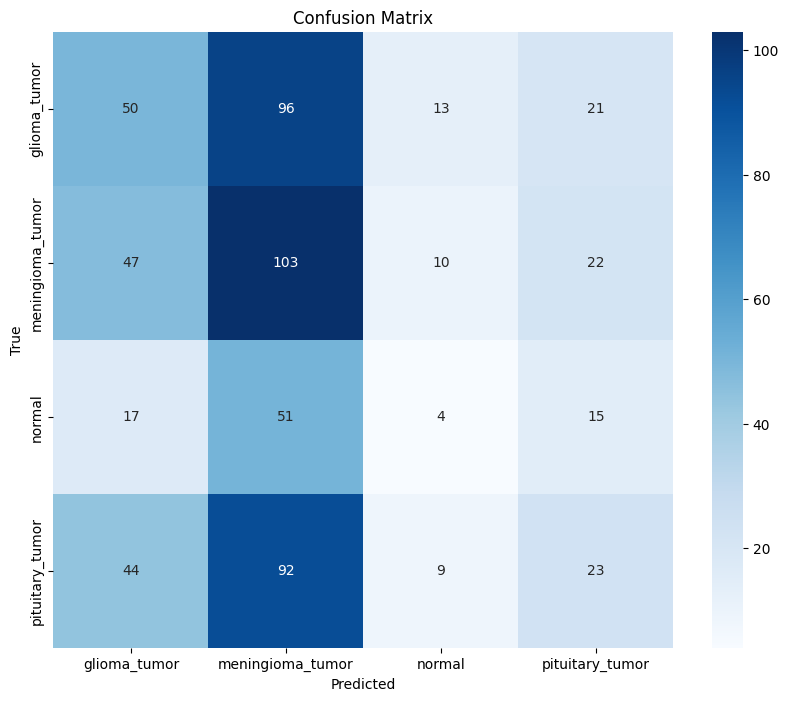

                  precision    recall  f1-score   support

    glioma_tumor       0.32      0.28      0.30       180
meningioma_tumor       0.30      0.57      0.39       182
          normal       0.11      0.05      0.07        87
 pituitary_tumor       0.28      0.14      0.18       168

        accuracy                           0.29       617
       macro avg       0.25      0.26      0.23       617
    weighted avg       0.27      0.29      0.26       617



In [17]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Predict on validation data
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_labels))


In [23]:
class_labels

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

In [18]:
def predict_tumor_type(img_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Make prediction
    prediction = model.predict(img_array)
    prediction_class = np.argmax(prediction, axis=1)[0]

    # Map class index to label
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[prediction_class]
    confidence = prediction[0][prediction_class]

    # Display the image with prediction
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.2f}")
    plt.axis('off')
    plt.show()

    return predicted_label, confidence


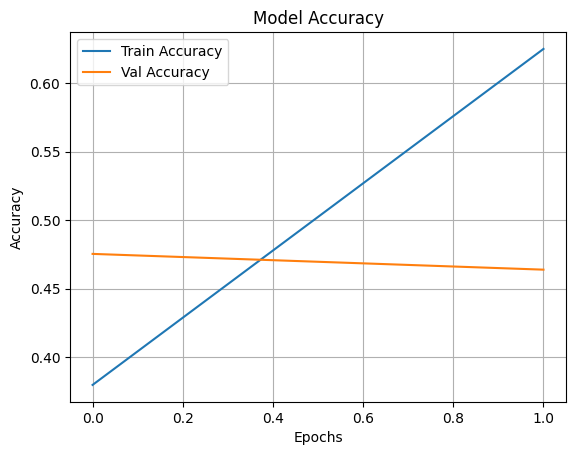

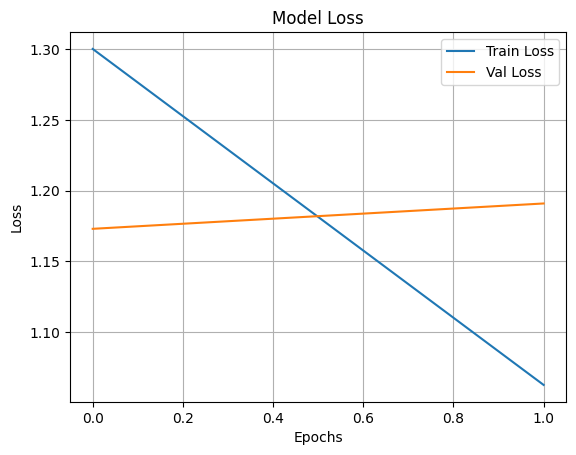

In [19]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model

# Create base model from pretrained EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add classification head
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(4, activation='softmax')(x)

# Create the full model
transfer_model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
transfer_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(validation_generator) # Changed val_generator to validation_generator
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 457ms/step - accuracy: 0.4346 - loss: 1.1798
Validation Accuracy: 44.08%
